# Haleema Sadia

# Intermediate Level Task
# Task 5 Exploratory Data Analysis on Dataset - Terrorism 
# LGMVIP JULY

In [178]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from scipy import stats
import folium

In [103]:
# load Data
path ="C:\\Users\\92336\\Downloads\\Global Terrorism - START data\\"
data = pd.read_csv(path+"globalterrorismdb_0718dist.csv",encoding ="ISO-8859-1")

C:\Users\92336\AppData\Local\Temp\ipykernel_13256\3321133742.py:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(path+"globalterrorismdb_0718dist.csv",encoding ="ISO-8859-1")


In [104]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Information About Data

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [106]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [107]:
data.isnull().sum().sum()

13853997

In [108]:
data.shape

(181691, 135)

# Missing Value Problem/Treatment

In [109]:
#percent of missing value in each coloumn
missing_coloumns =[]
print("Percentage of Missing values for each coloumn")
for col in data:
    percent_missing = data[col].isnull().sum() * 100 / len(data[col])
    print(col,": ",percent_missing)
    if(percent_missing>=60.0):
        missing_coloumns.append(col)
print(missing_coloumns,len(missing_coloumns))
    

Percentage of Missing values for each coloumn
eventid :  0.0
iyear :  0.0
imonth :  0.0
iday :  0.0
approxdate :  94.91499303762983
extended :  0.0
resolution :  98.7781453126462
country :  0.0
country_txt :  0.0
region :  0.0
region_txt :  0.0
provstate :  0.23171208260177995
city :  0.23886708752772565
latitude :  2.507554034046816
longitude :  2.5081044190411195
specificity :  0.0033023099658210917
vicinity :  0.0
location :  69.45638474112641
summary :  36.396409288297164
crit1 :  0.0
crit2 :  0.0
crit3 :  0.0
doubtterr :  0.0005503849943035153
alternative :  84.03278093026071
alternative_txt :  84.03278093026071
multiple :  0.0005503849943035153
success :  0.0
suicide :  0.0
attacktype1 :  0.0
attacktype1_txt :  0.0
attacktype2 :  96.5248691459676
attacktype2_txt :  96.5248691459676
attacktype3 :  99.7644352224381
attacktype3_txt :  99.7644352224381
targtype1 :  0.0
targtype1_txt :  0.0
targsubtype1 :  5.709143545910364
targsubtype1_txt :  5.709143545910364
corp1 :  23.41888150761

In [110]:
for col in data:
    missing = data[col].isnull().sum()
    print(col,": ",missing)

eventid :  0
iyear :  0
imonth :  0
iday :  0
approxdate :  172452
extended :  0
resolution :  179471
country :  0
country_txt :  0
region :  0
region_txt :  0
provstate :  421
city :  434
latitude :  4556
longitude :  4557
specificity :  6
vicinity :  0
location :  126196
summary :  66129
crit1 :  0
crit2 :  0
crit3 :  0
doubtterr :  1
alternative :  152680
alternative_txt :  152680
multiple :  1
success :  0
suicide :  0
attacktype1 :  0
attacktype1_txt :  0
attacktype2 :  175377
attacktype2_txt :  175377
attacktype3 :  181263
attacktype3_txt :  181263
targtype1 :  0
targtype1_txt :  0
targsubtype1 :  10373
targsubtype1_txt :  10373
corp1 :  42550
target1 :  636
natlty1 :  1559
natlty1_txt :  1559
targtype2 :  170547
targtype2_txt :  170547
targsubtype2 :  171006
targsubtype2_txt :  171006
corp2 :  171574
target2 :  170671
natlty2 :  170863
natlty2_txt :  170863
targtype3 :  180515
targtype3_txt :  180515
targsubtype3 :  180594
targsubtype3_txt :  180594
corp3 :  180665
target3 :  18

## Removing coloumns having more than 60% of missing data

In [111]:
#filtering coloumns with large number of gaps
data = data.drop(data[missing_coloumns],axis =1)

In [112]:
data.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,property,ishostkid,ransom,scite1,scite2,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,0,0.0,0.0,NaN,NaN,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,0,1.0,1.0,NaN,NaN,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,1,0.0,0.0,NaN,NaN,PGIS,-9,-9,1,1


# Missing Value

In [113]:
#percent of missing value in each coloumn
missing_coloumns =[]
print("Percentage of Missing values for each coloumn")
for col in data:
    percent_missing = data[col].isnull().sum() * 100 / len(data[col])
    print(col,": ",percent_missing)
    if(percent_missing>=60.0):
        missing_coloumns.append(col)
print(missing_coloumns,len(missing_coloumns))

Percentage of Missing values for each coloumn
eventid :  0.0
iyear :  0.0
imonth :  0.0
iday :  0.0
extended :  0.0
country :  0.0
country_txt :  0.0
region :  0.0
region_txt :  0.0
provstate :  0.23171208260177995
city :  0.23886708752772565
latitude :  2.507554034046816
longitude :  2.5081044190411195
specificity :  0.0033023099658210917
vicinity :  0.0
summary :  36.396409288297164
crit1 :  0.0
crit2 :  0.0
crit3 :  0.0
doubtterr :  0.0005503849943035153
multiple :  0.0005503849943035153
success :  0.0
suicide :  0.0
attacktype1 :  0.0
attacktype1_txt :  0.0
targtype1 :  0.0
targtype1_txt :  0.0
targsubtype1 :  5.709143545910364
targsubtype1_txt :  5.709143545910364
corp1 :  23.418881507614575
target1 :  0.35004485637703575
natlty1 :  0.8580502061191804
natlty1_txt :  0.8580502061191804
gname :  0.0
guncertain1 :  0.2091462978353358
individual :  0.0
nperps :  39.14062886989449
nperpcap :  38.24570286915697
claimed :  36.39145582334843
weaptype1 :  0.0
weaptype1_txt :  0.0
weapsubty

# Imputing data

In [114]:
categorical_columns = data.select_dtypes(include='object').columns
print(categorical_columns)

Index(['country_txt', 'region_txt', 'provstate', 'city', 'summary',
       'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt', 'corp1',
       'target1', 'natlty1_txt', 'gname', 'weaptype1_txt', 'weapsubtype1_txt',
       'weapdetail', 'scite1', 'scite2', 'dbsource'],
      dtype='object')


In [115]:
#imputing with unknown and 0 values
impute_constant = SimpleImputer(strategy='constant', fill_value='unknown')
data[categorical_columns] = impute_constant.fit_transform(data[categorical_columns ])

In [116]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
numerical_columns = numerical_columns.drop(['latitude', 'longitude'])
impute_constant = SimpleImputer(strategy='constant', fill_value=0)
data[numerical_columns] = impute_constant.fit_transform(data[numerical_columns])


In [117]:
# imputing latitude and longitude values with the average based on the country
stat_coords_mean = data.groupby(['country_txt'], as_index='country_txt').agg({'longitude': 'mean', 'latitude': 'mean'})
index_list_long = list(data.longitude[data.longitude.isna()].index)
index_list_lat = list(data.latitude[data.latitude.isna()].index)
index_list = list(set(index_list_long + index_list_lat))

for i in index_list:
    country = data.country_txt[i]
    data.loc[i, 'latitude'] = stat_coords_mean.latitude[country]
    data.loc[i, 'longitude'] = stat_coords_mean.longitude[country]

In [118]:
# checking for missing value in data
data.isnull().sum().sum()

2

In [119]:
#finding the missing coloumns
for col in data:
    missing = data[col].isnull().sum()
    if(missing>0):
        print(col,": ",missing)

latitude :  1
longitude :  1


In [120]:
#droping the missing rows
data = data[data.longitude.notna()]
data = data[data.latitude.notna()]

In [121]:
#recheking the missing values count
data.isnull().sum().sum()

0

## Checking for Outliers in columns having higher std

In [122]:
check_outliers = ['eventid','longitude']
z_scores = np.abs(stats.zscore(data[check_outliers]))

# Set a threshold for considering values as outliers
threshold = 3

# Find the columns with outlier values
outlier_rows = np.where(z_scores > threshold)[0]

# Count the number of outlier rows for each column
num_outlier_rows = {column: len(np.where(outlier_rows == idx)[0]) for idx, column in enumerate(check_outliers)}

# Print the number of outlier rows for each column
for column, num_outliers in num_outlier_rows.items():
    print(f"Number of outliers in {column}: {num_outliers}")

Number of outliers in eventid: 0
Number of outliers in longitude: 0


## checking for duplicate rows

In [123]:
#check for duplicate values
duplicate_rows = data.duplicated()
print('Number of duplicated rows - ',len(data[duplicate_rows]))

Number of duplicated rows -  0


# Filtering unnecessry coloumns

In [124]:
#removing unnecessary columns
data = data[['nwound', 'targsubtype1_txt', 'nkill', 'longitude', 'latitude', 'natlty1_txt', 'target1', 'city', 'iyear', 'iday', 
         'imonth', 'targtype1_txt', 'gname', 'region_txt', 'country_txt', 'weaptype1_txt', 'attacktype1_txt', 'success']]
data.head()

,nwound,targsubtype1_txt,nkill,longitude,latitude,natlty1_txt,target1,city,iyear,iday,imonth,targtype1_txt,gname,region_txt,country_txt,weaptype1_txt,attacktype1_txt,success
0,0.0,Named Civilian,1.0,-69.951164,18.456792,Dominican Republic,Julio Guzman,Santo Domingo,1970.0,2.0,7.0,Private Citizens & Property,MANO-D,Central America & Caribbean,Dominican Republic,Unknown,Assassination,1.0
1,0.0,"Diplomatic Personnel (outside of embassy, cons...",0.0,-99.086624,19.371887,Belgium,"Nadine Chaval, daughter",Mexico city,1970.0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,North America,Mexico,Unknown,Hostage Taking (Kidnapping),1.0
2,0.0,Radio Journalist/Staff/Facility,1.0,120.599741,15.478598,United States,Employee,Unknown,1970.0,0.0,1.0,Journalists & Media,Unknown,Southeast Asia,Philippines,Unknown,Assassination,1.0
3,0.0,Embassy/Consulate,0.0,23.762728,37.997490,United States,U.S. Embassy,Athens,1970.0,0.0,1.0,Government (Diplomatic),Unknown,Western Europe,Greece,Explosives,Bombing/Explosion,1.0
4,0.0,Embassy/Consulate,0.0,130.396361,33.580412,United States,U.S. Consulate,Fukouka,1970.0,0.0,1.0,Government (Diplomatic),Unknown,East Asia,Japan,Incendiary,Facility/Infrastructure Attack,1.0


# Final Data

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181690 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   nwound            181690 non-null  float64
 1   targsubtype1_txt  181690 non-null  object 
 2   nkill             181690 non-null  float64
 3   longitude         181690 non-null  float64
 4   latitude          181690 non-null  float64
 5   natlty1_txt       181690 non-null  object 
 6   target1           181690 non-null  object 
 7   city              181690 non-null  object 
 8   iyear             181690 non-null  float64
 9   iday              181690 non-null  float64
 10  imonth            181690 non-null  float64
 11  targtype1_txt     181690 non-null  object 
 12  gname             181690 non-null  object 
 13  region_txt        181690 non-null  object 
 14  country_txt       181690 non-null  object 
 15  weaptype1_txt     181690 non-null  object 
 16  attacktype1_txt   18

# Type casting data types

In [126]:
# type casting data types that should be int but are float
data.nwound = data.nwound.astype('int')
data.nkill = data.nkill.astype('int')
data.success = data.success.astype('int')
data.head()

,nwound,targsubtype1_txt,nkill,longitude,latitude,natlty1_txt,target1,city,iyear,iday,imonth,targtype1_txt,gname,region_txt,country_txt,weaptype1_txt,attacktype1_txt,success
0,0,Named Civilian,1,-69.951164,18.456792,Dominican Republic,Julio Guzman,Santo Domingo,1970.0,2.0,7.0,Private Citizens & Property,MANO-D,Central America & Caribbean,Dominican Republic,Unknown,Assassination,1
1,0,"Diplomatic Personnel (outside of embassy, cons...",0,-99.086624,19.371887,Belgium,"Nadine Chaval, daughter",Mexico city,1970.0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,North America,Mexico,Unknown,Hostage Taking (Kidnapping),1
2,0,Radio Journalist/Staff/Facility,1,120.599741,15.478598,United States,Employee,Unknown,1970.0,0.0,1.0,Journalists & Media,Unknown,Southeast Asia,Philippines,Unknown,Assassination,1
3,0,Embassy/Consulate,0,23.762728,37.997490,United States,U.S. Embassy,Athens,1970.0,0.0,1.0,Government (Diplomatic),Unknown,Western Europe,Greece,Explosives,Bombing/Explosion,1
4,0,Embassy/Consulate,0,130.396361,33.580412,United States,U.S. Consulate,Fukouka,1970.0,0.0,1.0,Government (Diplomatic),Unknown,East Asia,Japan,Incendiary,Facility/Infrastructure Attack,1


## rename the coloumns for better understanding

In [127]:
#rename the coloumns 
data = data.rename(columns={'nwound': 'number_of_wounded', 'targsubtype1_txt': 'target_subtype', 'nkill': 'number_of_kils', 
                        'natlty1_txt': 'terrorists_nationality', 'target': 'target_place', 'iyear': 'year', 'iday': 'day',
                        'imonth': 'month', 'targtype1_txt': 'target_type', 'gname': 'terrorist_grp_name', 
                        'region_txt': 'region', 'country_txt': 'country', 'weaptype1_txt': 'weapon_type',
                        'attacktype1_txt': 'attack_type'})


In [128]:
data.head()

,number_of_wounded,target_subtype,number_of_kils,longitude,latitude,terrorists_nationality,target1,city,year,day,month,target_type,terrorist_grp_name,region,country,weapon_type,attack_type,success
0,0,Named Civilian,1,-69.951164,18.456792,Dominican Republic,Julio Guzman,Santo Domingo,1970.0,2.0,7.0,Private Citizens & Property,MANO-D,Central America & Caribbean,Dominican Republic,Unknown,Assassination,1
1,0,"Diplomatic Personnel (outside of embassy, cons...",0,-99.086624,19.371887,Belgium,"Nadine Chaval, daughter",Mexico city,1970.0,0.0,0.0,Government (Diplomatic),23rd of September Communist League,North America,Mexico,Unknown,Hostage Taking (Kidnapping),1
2,0,Radio Journalist/Staff/Facility,1,120.599741,15.478598,United States,Employee,Unknown,1970.0,0.0,1.0,Journalists & Media,Unknown,Southeast Asia,Philippines,Unknown,Assassination,1
3,0,Embassy/Consulate,0,23.762728,37.997490,United States,U.S. Embassy,Athens,1970.0,0.0,1.0,Government (Diplomatic),Unknown,Western Europe,Greece,Explosives,Bombing/Explosion,1
4,0,Embassy/Consulate,0,130.396361,33.580412,United States,U.S. Consulate,Fukouka,1970.0,0.0,1.0,Government (Diplomatic),Unknown,East Asia,Japan,Incendiary,Facility/Infrastructure Attack,1


# Method to calculate most frequent observations

In [130]:
# Get the top 30 target subtypes
def top_values(col):
    top_12 = data[col].value_counts().head(12)
    return top_12


# EDA

## Top 12 Terrorists Nationalities

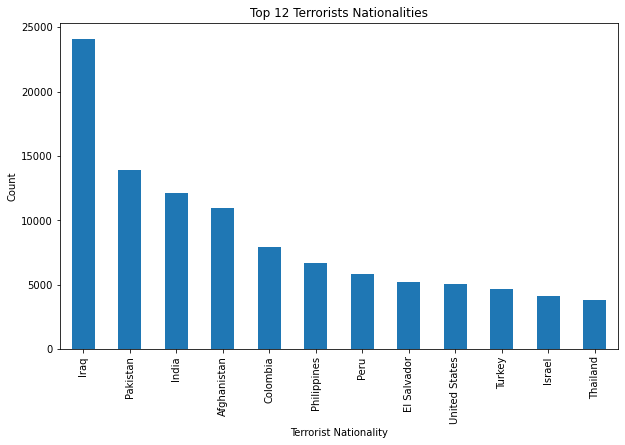

In [191]:
top_terrorists_nat = top_values('terrorists_nationality')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_terrorists_nat.plot(kind='bar')
plt.title('Top 12 Terrorists Nationalities')
plt.xlabel('Terrorist Nationality')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Target Types

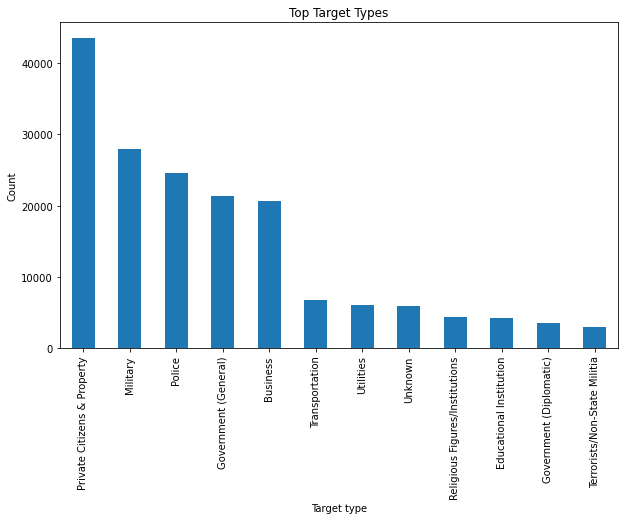

In [190]:
top_target_types = top_values('target_type')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_target_types.plot(kind='bar')
plt.title('C')
plt.xlabel('Target type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Cities Attacked

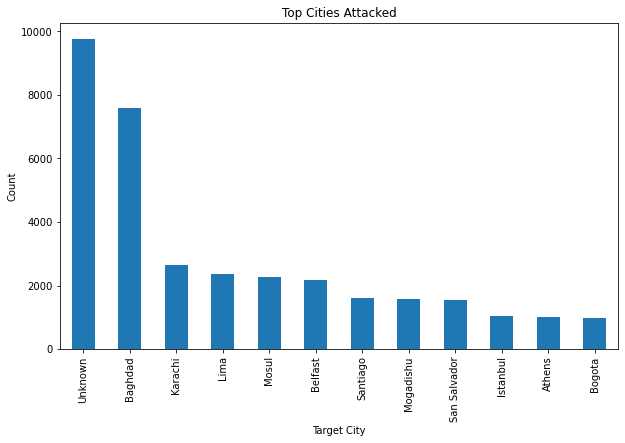

In [189]:
top_cities = top_values('city')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar')
plt.title('Top Cities Attacked')
plt.xlabel('Target City')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Terrorist Groups Responsible for Attacks

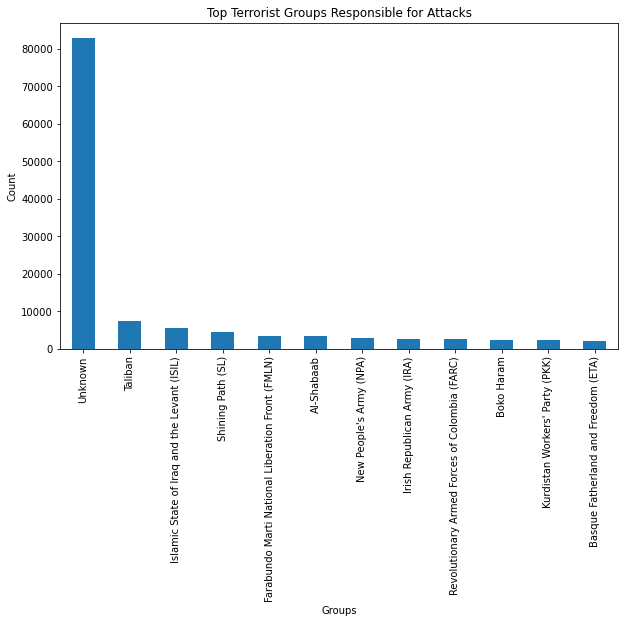

In [188]:
top_grps = top_values('terrorist_grp_name')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_grps.plot(kind='bar')
plt.title('Top Terrorist Groups Responsible for Attacks')
plt.xlabel('Groups')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Countries Where Most Attacks Occured

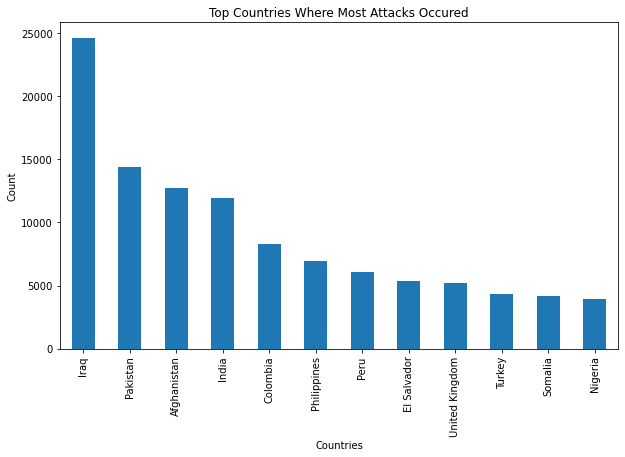

In [187]:
top_country = top_values('country')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_country.plot(kind='bar')
plt.title('Top Countries Where Most Attacks Occured')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Attack Types

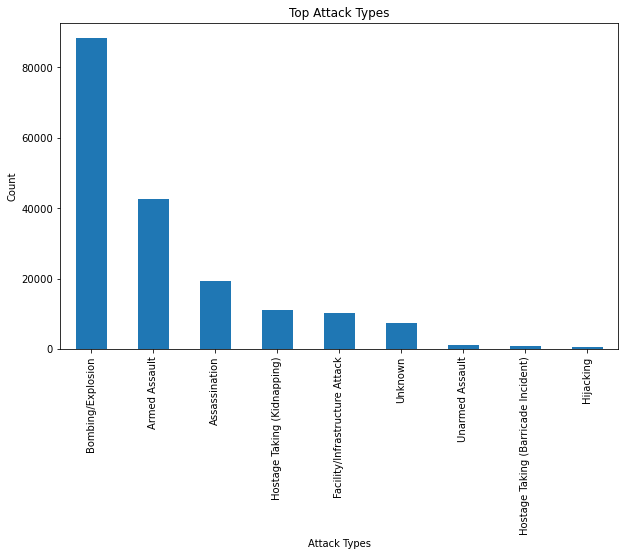

In [186]:
top_attck_types = top_values('attack_type')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_attck_types.plot(kind='bar')
plt.title('Top Attack Types')
plt.xlabel('Attack Types')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Regions Where Most Attacks Occured'

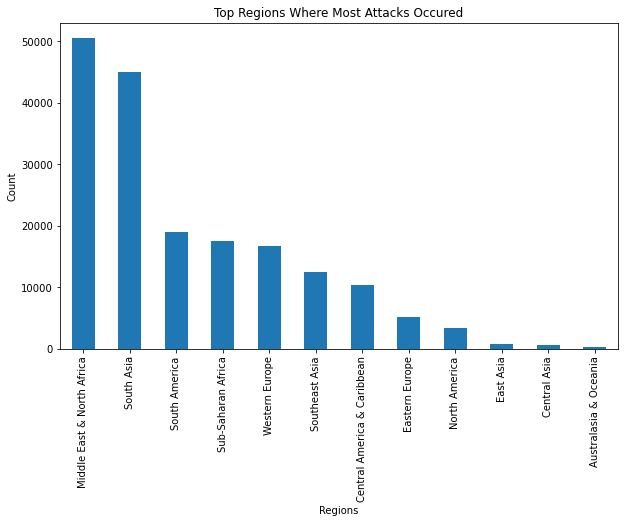

In [185]:
top_region = top_values('region')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_region.plot(kind='bar')
plt.title('Top Regions Where Most Attacks Occured')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Top Years in which Most Attacks Occured

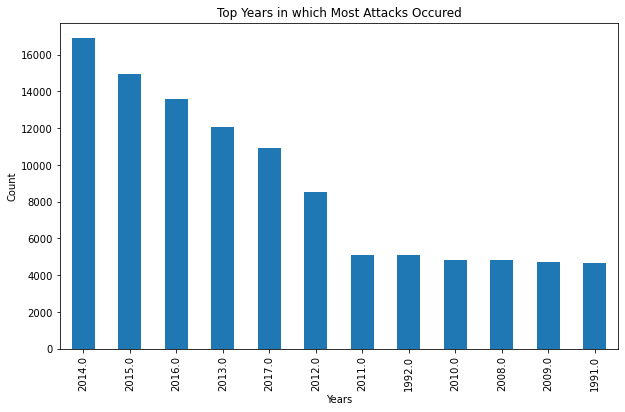

In [184]:
top_year = top_values('year')
# Plot the top 30 target subtypes
plt.figure(figsize=(10, 6))
top_year.plot(kind='bar')
plt.title('Top Years in which Most Attacks Occured')
plt.xlabel('Years')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

## Attacks vs Year

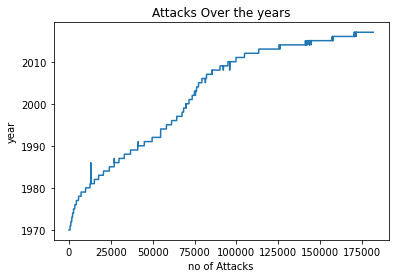

In [227]:
plt.plot(data['year'])
plt.title("Attacks Over the years")
plt.xlabel("no of Attacks")
plt.ylabel("year")
plt.show()

## Successful vs unsuccesful Attacks

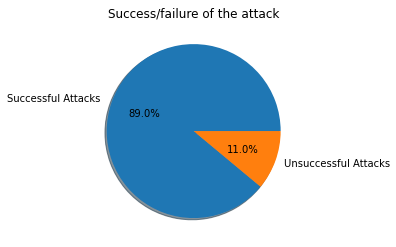

In [181]:
labels = ['Successful Attacks ', 'Unsuccessful Attacks']
plt.pie(data.success.value_counts(), 
        labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Success/failure of the attack')
plt.show();

## A method to calculate percentage of kills

In [207]:
def calculate_kills(col):
    kills =0
    notkills=0
    for i in col:
        if( i > 0):
            kills+=1
        else:
            notkills+=1
    kills = (kills/len(data['number_of_kils']))*100
    notkills = (notkills/len(data['number_of_kils']))*100
    return kills, notkills

## Percetage of people kill in the attacks

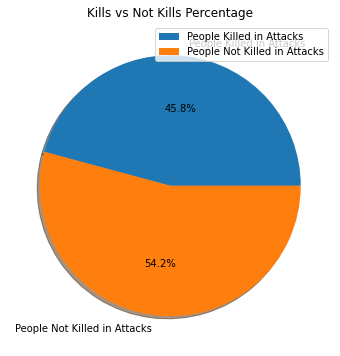

In [209]:
labels = ['People Killed in Attacks', 'People Not Killed in Attacks']
percentages = calculate_kills(data['number_of_kils'])

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%',shadow = True)
plt.title('Kills vs Not Kills Percentage')
plt.legend()
plt.show()

# Conclusion

# Report

# Group with Highest success rate and its Details

In [232]:
# Find the group with the highest success rate
highest_success_rate_group = data.loc[data['success'].idxmax(), 'terrorist_grp_name']
# Print the group with the highest success rate
print("Group with the highest success rate:", highest_success_rate_group)
mano_d_data = data.loc[data['terrorist_grp_name'] == 'MANO-D']
country_attckd = mano_d_data['country'].value_counts().idxmax()
region_attkd =  mano_d_data['region'].value_counts().idxmax()
attack_type =  mano_d_data['attack_type'].value_counts().idxmax()
target_type = mano_d_data['target_type'].value_counts().idxmax()


Group with the highest success rate: MANO-D


# Findings

In [231]:
print("My findings in eda are: ")
print("Region Most Attacked: ",top_region.index[0])
print("Country in the Region most Attacked: ",top_country.index[0])
print("City in the Country Most Attacked: ",top_cities.index[0])
print("Target Type Attacked: ",top_target_types.index[0])
print("Attack Type used: ",top_attck_types.index[0])
print(" Group Who Attacked: ",top_grps.index[1])
print("Countries these groups belong to: ",top_terrorists_nat.index[0])
print("Year in Which Most Attacks Occured: ",top_year.index[0])
print()
print("Group with the highest success rate:", highest_success_rate_group)
print("Country most attacked by MANO-D:", country_attckd)
print("Region most attacked by MANO-D:", region_attkd)
print("Attack Type most used by MANO-D:", attack_type)
print("Target Type most attacked by MANO-D:", target_type)
print("Nationality of  MANO-D:", mano_d_data['terrorists_nationality'].unique())
print("Number of kills vs not kills for MANO-D", calculate_kills(mano_d_data['number_of_kils']))

My findings in eda are: 
Region Most Attacked:  Middle East & North Africa
Country in the Region most Attacked:  Iraq
City in the Country Most Attacked:  Unknown
Target Type Attacked:  Private Citizens & Property
Attack Type used:  Bombing/Explosion
 Group Who Attacked:  Taliban
Countries these groups belong to:  Iraq
Year in Which Most Attacks Occured:  2014.0

Group with the highest success rate: MANO-D
Country most attacked by MANO-D: Dominican Republic
Region most attacked by MANO-D: Central America & Caribbean
Attack Type most used by MANO-D: Assassination
Target Type most attacked by MANO-D: Private Citizens & Property
Nationality of  MANO-D: ['Dominican Republic']
Number of kills vs not kills for MANO-D (0.0005503880235566074, 0.0)


## My findings in eda are: 
## Region Most Attacked:  Middle East & North Africa
## Country in the Region most Attacked:  Iraq
## City in the Country Most Attacked:  Unknown
## Target Type Attacked:  Private Citizens & Property
## Attack Type used:  Bombing/Explosion
##  Group Who Attacked:  Taliban
## Countries these groups belong to:  Iraq
## Year in Which Most Attacks Occured:  2014.0

## Group with the highest success rate: MANO-D
## Country most attacked by MANO-D: Dominican Republic
## Region most attacked by MANO-D: Central America & Caribbean
## Attack Type most used by MANO-D: Assassination
## Target Type most attacked by MANO-D: Private Citizens & Property
## Nationality of  MANO-D: ['Dominican Republic']
## Number of kills vs not kills for MANO-D (0.0005503880235566074, 0.0)